In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_csv('data/baseball/player.csv')
team = pd.read_csv('data/baseball/team.csv')
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

### Distributions and trends of important variables

#### Batting


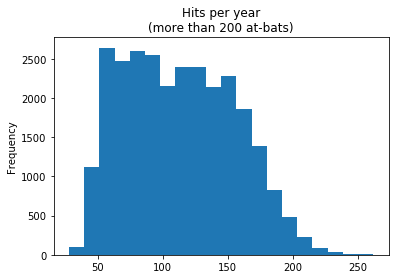

In [10]:
batting[batting.ab>200].h.plot(kind='hist', bins=20, title='Hits per year\n(more than 200 at-bats)')

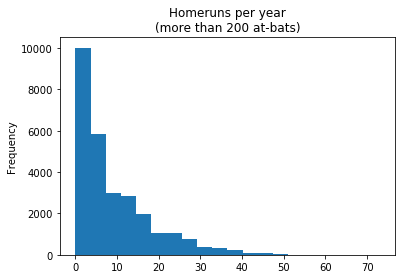

In [11]:
batting[batting.ab>200].hr.plot(kind='hist', bins=20, title='Homeruns per year\n(more than 200 at-bats)')

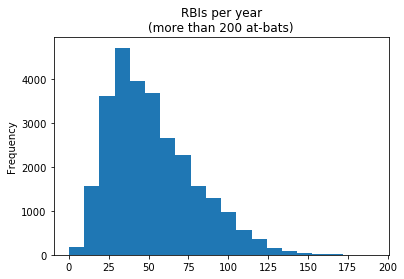

In [12]:
batting[batting.ab>200].rbi.plot(kind='hist', bins=20, title='RBIs per year\n(more than 200 at-bats)')

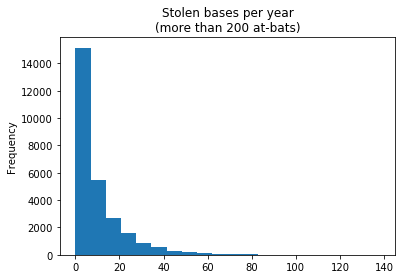

In [13]:
batting[batting.ab>200].sb.plot(kind='hist', bins=20, title='Stolen bases per year\n(more than 200 at-bats)')

All four stats are fairly right-tailed, even when limited to players with 200 at-bats in the year. What about averages by at-bat?

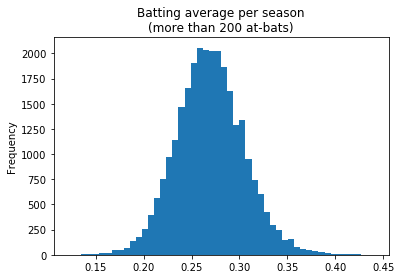

In [14]:
min_ab = 200
avg = batting[batting.ab>min_ab].h / batting[batting.ab>min_ab].ab
avg.plot(kind='hist', bins=50, title='Batting average per season\n(more than 200 at-bats)')

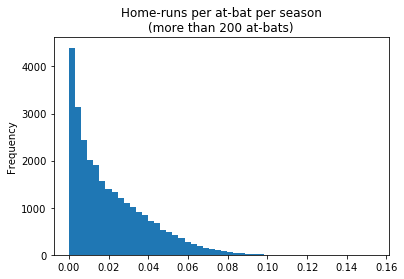

In [15]:
min_ab = 200
hr_avg = batting[batting.ab>min_ab].hr / batting[batting.ab>min_ab].ab
hr_avg.plot(kind='hist', bins=50, title='Home-runs per at-bat per season\n(more than 200 at-bats)')

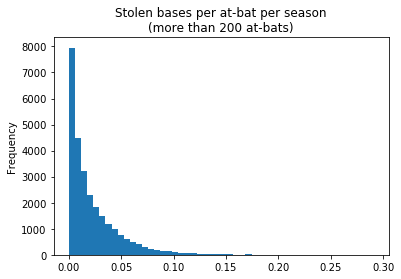

In [16]:
min_ab = 200
sb_avg = batting[batting.ab>min_ab].sb / batting[batting.ab>min_ab].ab
sb_avg.plot(kind='hist', bins=50, title='Stolen bases per at-bat per season\n(more than 200 at-bats)')

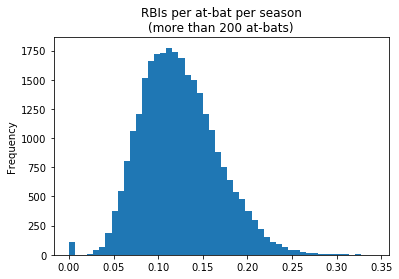

In [17]:
min_ab = 200
rbi_avg = batting[batting.ab>min_ab].rbi / batting[batting.ab>min_ab].ab
rbi_avg.plot(kind='hist', bins=50, title='RBIs per at-bat per season\n(more than 200 at-bats)')

Batting averages are quite normal, while the homeruns per at-bat average looks similar to homeruns per year.

#### Pitching
Next, I will look at the `pitching` dataset.

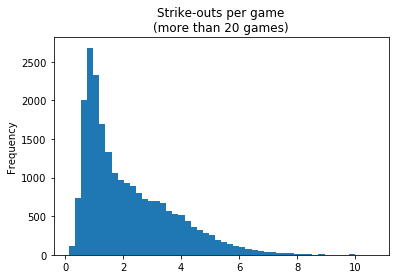

In [18]:
min_g = 20
g = pitching[pitching.g>min_g].g
so = pitching[pitching.g>min_g].so
(so/g).plot(kind='hist', bins=50, title='Strike-outs per game\n(more than 20 games)')

This variable is not so helpful because some pitchers only pitch part of a game. Let's look at the distribution per inning.

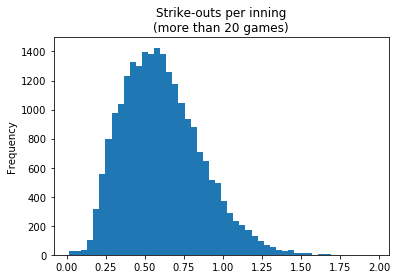

In [19]:
pitching['inn'] = (9 * pitching.er / pitching.era)
inn = pitching[pitching.g>20].inn
so = pitching[pitching.g>20].so
(so/inn).plot(kind='hist', bins=50, title='Strike-outs per inning\n(more than 20 games)')

Strike-outs by inning looks significantly more normal.

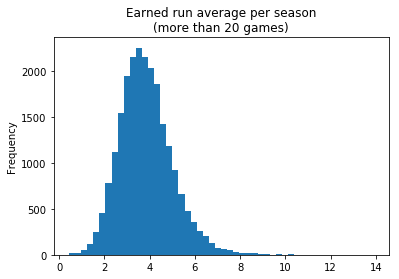

In [20]:
pitching[pitching.g>20].era.plot(kind='hist', bins=50, title='Earned run average per season\n(more than 20 games)')

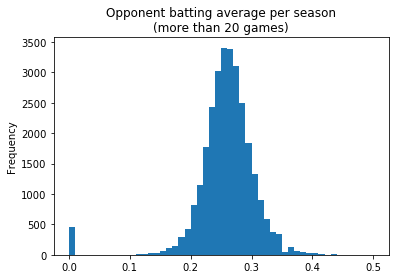

In [21]:
pitching[pitching.g>10].baopp.replace(9.99,np.nan).dropna().plot(
    kind='hist', bins=50, title='Opponent batting average per season\n(more than 20 games)')

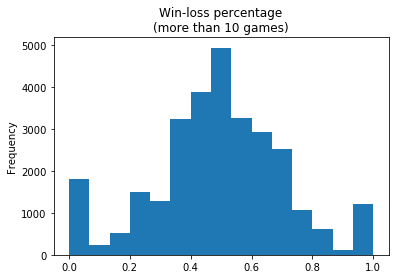

In [22]:
wlp = (pitching[pitching.g>10].w / (pitching[pitching.g>10].w + pitching[pitching.g>10].l))
wlp.plot(kind='hist', bins=15, title='Win-loss percentage\n(more than 10 games)')

#### Number of players

As the league as grown in popularity, the number of players in the MLB has also grown significantly. Below are the trends for the total number of batters and pitchers, and the number of players per tream since the inception of the league in 1871.

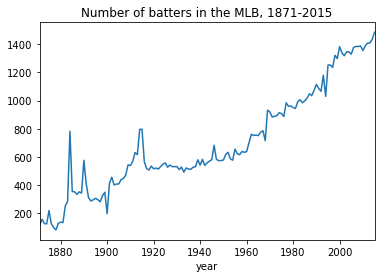

In [36]:
batting.groupby('year').size().plot(title='Number of batters in the MLB, 1871-2015')

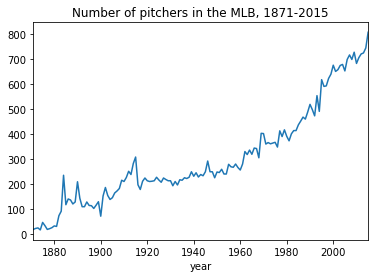

In [37]:
pitching.groupby('year').size().plot(title='Number of pitchers in the MLB, 1871-2015')

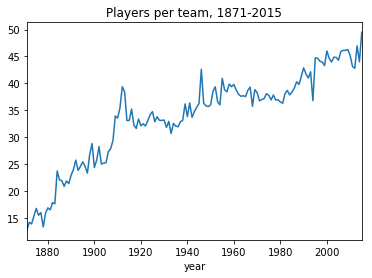

In [38]:
(appearances.groupby('year').size() / team.groupby('year').size()).plot(title='Players per team, 1871-2015')

## Data Trends and Relationships

### Does hitting get bigger over time?

I first calculate different kinds of averages used by baseball statisticians. The slugger average, the most popular after the normal batting average, weights the average based on the kind of hit. Doubles are twice as important as singles, triples are three times, and homeruns are four times. The difference between a slugger average and a batting average suggest how big of hits a player is getting.

I find that the difference between the median slugger average and the median batting average has been growing over time. This suggests that batters are hitting more extra-base hits now than they used to.

In [39]:
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['avg'] = batting.h / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['ops'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3 + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['woba'] = (batting.h*0.9 + batting.double*0.34 + batting.triple*0.66 + batting.hr*1.05 + batting.bb*0.72 + batting.hbp*0.75) / (batting.ab + batting.bb + batting.hbp)

In [40]:
slug = batting.groupby('year')['slug'].median()
avg = batting.groupby('year')['avg'].median()
obp = batting.groupby('year')['obp'].median()
ops = batting.groupby('year')['ops'].median()
woba = batting.groupby('year')['woba'].median()

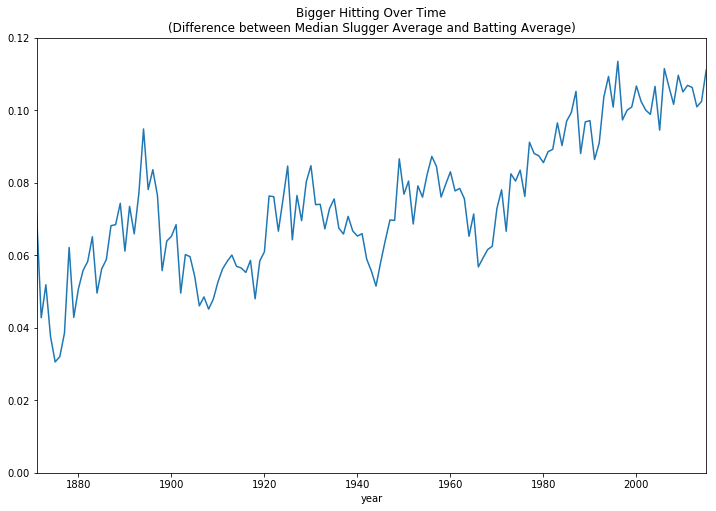

In [41]:
(slug - avg).plot(figsize=(12,8),
                  title='Bigger Hitting Over Time\n(Difference between Median Slugger Average and Batting Average)',
                 ylim=(0,0.12))

### Differences in number of extra-base hits over time

Here I compare the percentages of different kinds of extra-base hits over time. Both homeruns and doubles as a percentage of total at-bats have increased over time, while triples have declined.

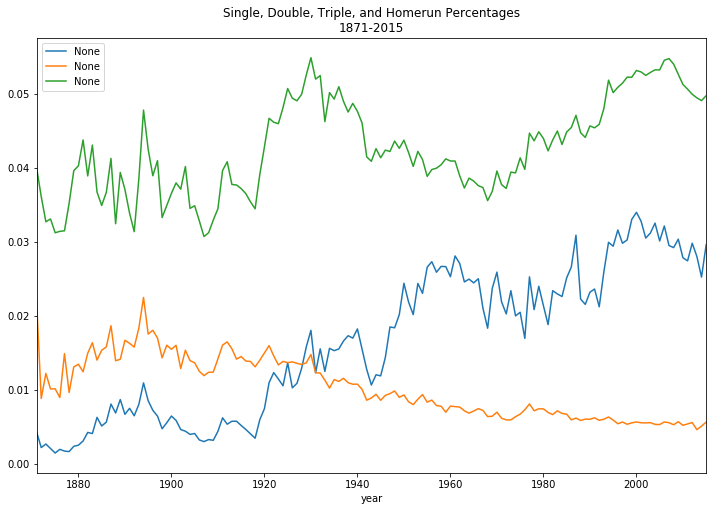

In [42]:
batting['single'] = batting.h - batting.hr - batting.double - batting.triple
hrs = batting.groupby('year')['hr'].sum()
triples = batting.groupby('year')['triple'].sum()
doubles = batting.groupby('year')['double'].sum()
singles = batting.groupby('year')['single'].sum()
ab = batting.groupby('year')['ab'].sum()

(hrs/ab).plot(figsize=(12,8), legend=True, title='Single, Double, Triple, and Homerun Percentages\n1871-2015')
(triples/ab).plot(figsize=(12,8), legend=True)
(doubles/ab).plot(figsize=(12,8), legend=True)

### Why are there less triples over time?

In the graph above, we find that the number of triples per at-bat has steadily declined over time. Why?

One explanation is that fielding has improved, and thus runners are less likely to reach third base safely. As a proxy for fielding, I use average number of errors per inning. As shown below, there is a steady decline in the number of errors over time, which appears to line up with the decline in triples. However, it is possible that there is an exogenous downward trend for both statistics. They would have to be detrended to find a true relationship between them.

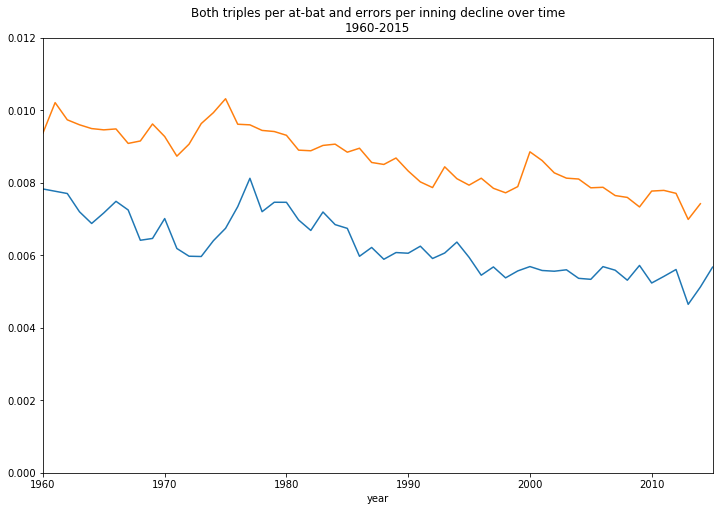

In [43]:
fielding = fielding[(fielding.inn_outs > 0) & (fielding.year > 1959)]
batting = batting[batting.year > 1959]
inns = fielding.groupby('year')['inn_outs'].sum()/3
errors = fielding.groupby('year')['e'].sum()

(triples/ab).plot(figsize=(12,8), xlim=(1960,2015), ylim=(0,.012))
(errors/inns).plot(figsize=(12,8), xlim=(1960,2015),
                   title='Both triples per at-bat and errors per inning decline over time\n1960-2015')

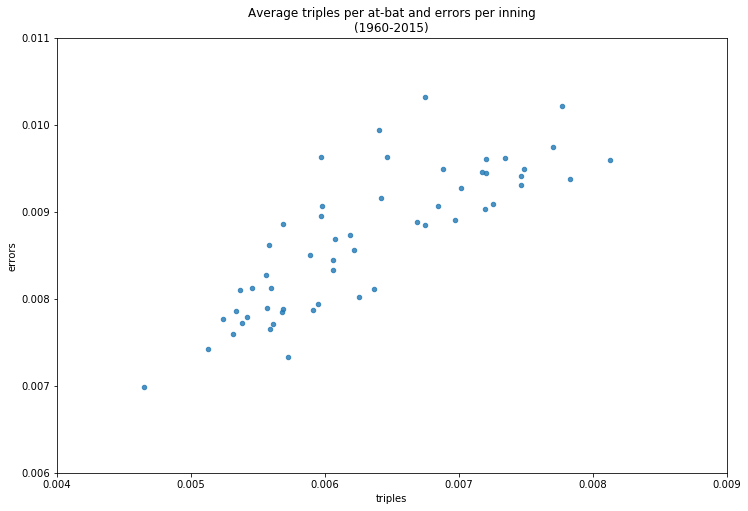

In [44]:
df = pd.concat([(triples/ab), (errors/inns)], axis=1)
df.columns = ['triples', 'errors']
df.plot(x=0, y=1, kind='scatter', figsize=(12,8), alpha=0.8, xlim=(0.004,0.009), ylim=(0.006,0.011),
        title='Average triples per at-bat and errors per inning\n(1960-2015)')

### What is the relationship between homeruns and other kinds of at-bats?

I create scatterplots to see if there is a relationship between different results of at-bats for batters within more than 200 at-bats in 2015. I plot various results compared to homeruns.

I find that there is no correlation between doubles and homeruns. Doubles can be the result of power hitting (which would be positively associated with homeruns) or from speed on the bases (which would be negatively associated with homeruns).

I find that there is a negative correlation between singles and homeruns. Players who hit a lot of homeruns do not hit as many singles. This is likely because homerun hitters also tend to hit more fly balls or strike-out more often (see below).

I find a slightly positive correlation between walks and homeruns. There are two possible explanations here. First, players who hit more homeruns are more patient, and tend to see more pitches, which inevitably leads to more walks on average. Second, pitches are more likely to intentionally throw balls to good hitters, leading to more walks.

Finally, I find a positive correlation between homeruns and strikeouts. This is likely because homerun hitters swing for power instead of contact. Thus, they are more likely to miss the ball when swinging, leading to more strikes, and thus more strikeouts.

In [45]:
batting_2015 = batting[(batting.year == 2015) &
                       (batting.ab > 200)]
batting_2015['bb_avg'] = batting_2015.bb / batting_2015.ab
batting_2015['hr_avg'] = batting_2015.hr / batting_2015.ab
batting_2015['single_avg'] = batting_2015.single / batting_2015.ab
batting_2015['triple_avg'] = batting_2015.triple / batting_2015.ab
batting_2015['double_avg'] = batting_2015.double / batting_2015.ab
batting_2015['so_avg'] = batting_2015.so / batting_2015.ab

C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


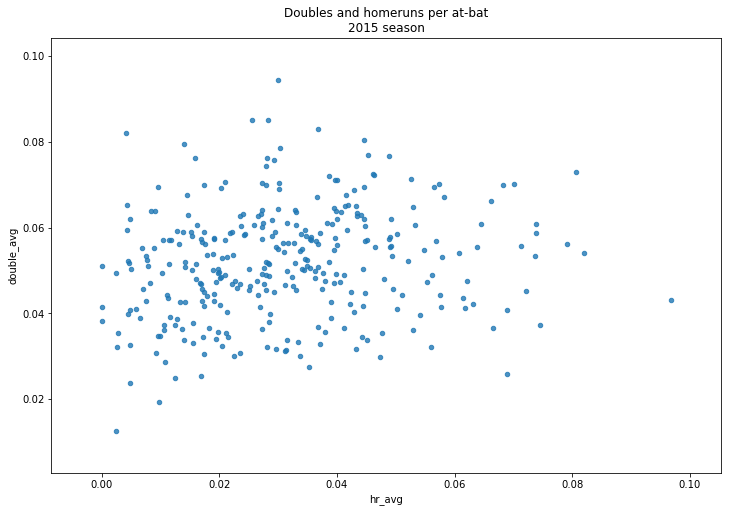

In [46]:
batting_2015.plot(x='hr_avg', y='double_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Doubles and homeruns per at-bat\n2015 season')

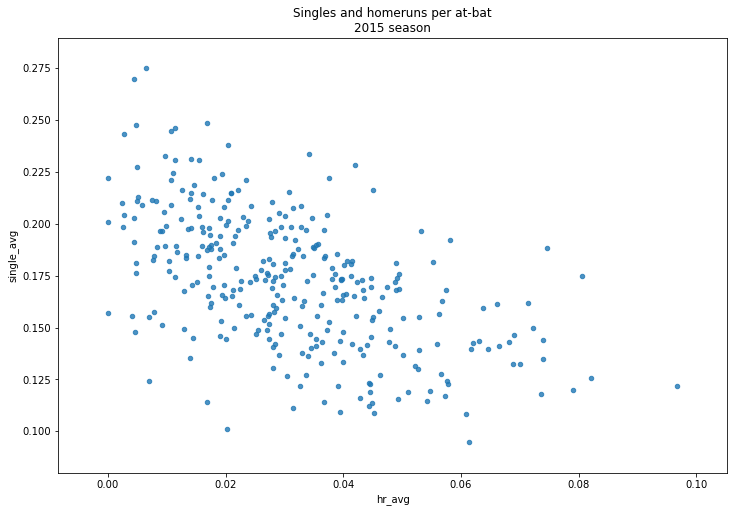

In [47]:
batting_2015.plot(x='hr_avg', y='single_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Singles and homeruns per at-bat\n2015 season')

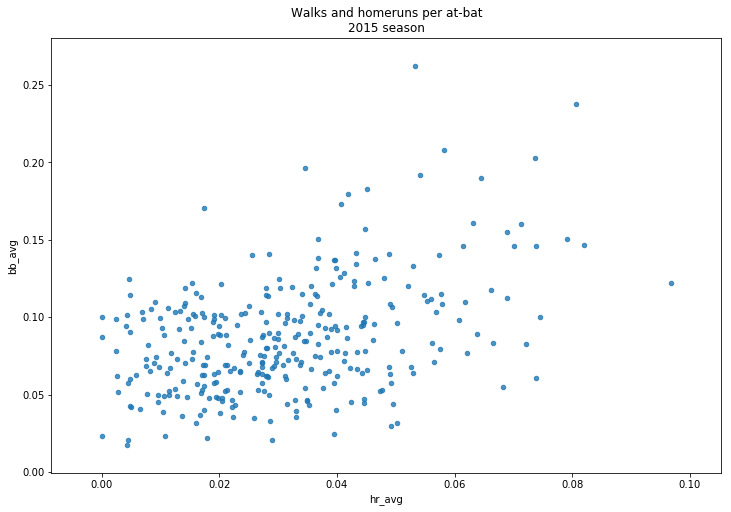

In [48]:
batting_2015.plot(x='hr_avg', y='bb_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Walks and homeruns per at-bat\n2015 season')

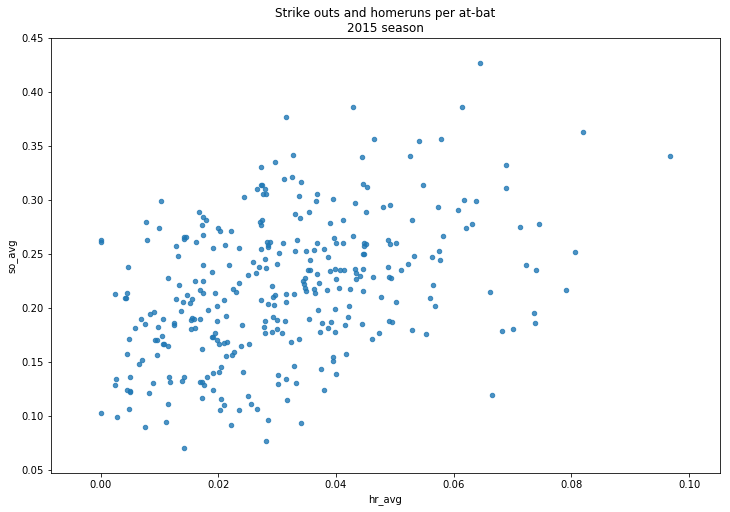

In [49]:
batting_2015.plot(x='hr_avg', y='so_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Strike outs and homeruns per at-bat\n2015 season')

### Salary and Player Stats

In [23]:
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting_salary = batting.merge(salary)

In [24]:
batting_salary_2015 = batting_salary[(batting_salary.ab > 200) & (batting_salary.year == 2015)]

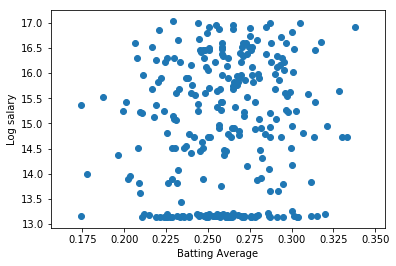

In [25]:
plt.scatter((batting_salary_2015.h / batting_salary_2015.ab), np.log(batting_salary_2015.salary))
plt.xlabel("Batting Average")
plt.ylabel("Log salary")

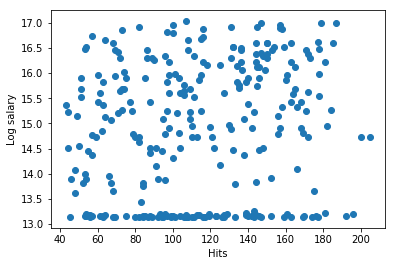

In [26]:
plt.scatter(batting_salary_2015.h, np.log(batting_salary_2015.salary))
plt.xlabel("Hits")
plt.ylabel("Log salary")

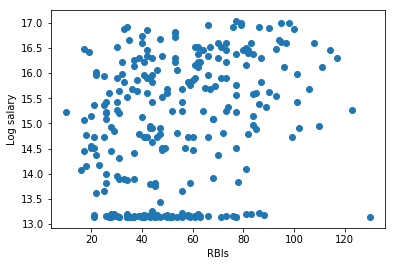

In [27]:
plt.scatter(batting_salary_2015.rbi, np.log(batting_salary_2015.salary))
plt.xlabel("RBIs")
plt.ylabel("Log salary")

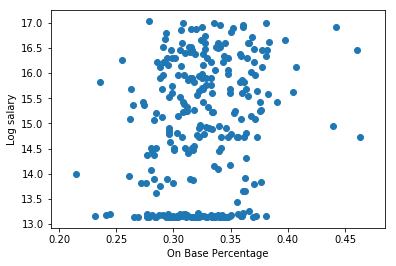

In [30]:
plt.scatter(batting_salary_2015.obp, np.log(batting_salary_2015.salary))
plt.xlabel("On Base Percentage")
plt.ylabel("Log salary")

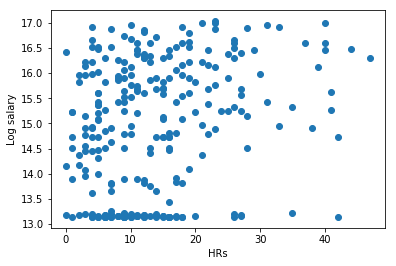

In [29]:
plt.scatter(batting_salary_2015.hr, np.log(batting_salary_2015.salary))
plt.xlabel("HRs")
plt.ylabel("Log salary")

#### Pitching

In [14]:
pitching['inn'] = (9 * pitching.er / pitching.era)
pitching_salary = pitching.merge(salary)

In [31]:
pitching_salary_2015 = pitching_salary[((pitching_salary_2015.w + pitching_salary_2015.l) > 10) & (pitching_salary.year == 2015)]

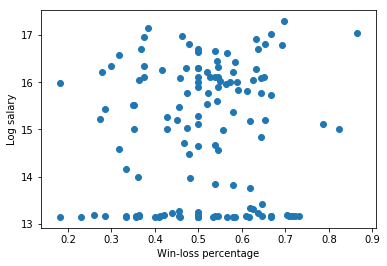

In [32]:
plt.scatter((pitching_salary_2015.w / (pitching_salary_2015.w + pitching_salary_2015.l)), np.log(pitching_salary_2015.salary))
plt.xlabel("Win-loss percentage")
plt.ylabel("Log salary")

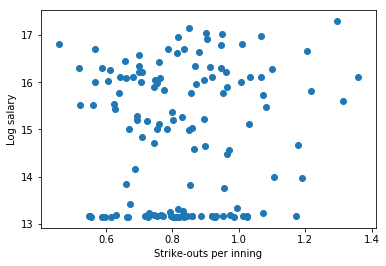

In [33]:
plt.scatter((pitching_salary_2015.so / pitching_salary_2015.inn), np.log(pitching_salary_2015.salary))
plt.xlabel("Strike-outs per inning")
plt.ylabel("Log salary")